In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv("finalairline_weather.csv")
df.head(5)

,FlightDate,dep_datetime,Arr_datetime,Month,DayOfWeek,DepTimeBlk,Reporting_Airline,Flight_Number_Reporting_Airline,Origin,Dest,...,dest_visibility_m,dest_slp_hpa,dest_ceiling_m,dest_wind_dir_deg,dest_wind_speed_mps,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2018-01-01,2018-01-01 00:45:00,2018-01-01 07:02:00,1,1,0001-0559,AA,1983.0,PHX,PHL,...,16093.0,1030.2,22000.0,310.0,3.6,NaN,NaN,NaN,NaN,NaN
1,2018-01-01,2018-01-01 06:00:00,2018-01-01 08:04:00,1,1,0600-0659,AA,1731.0,ATL,PHL,...,16093.0,1030.1,22000.0,310.0,3.1,NaN,NaN,NaN,NaN,NaN
2,2018-01-01,2018-01-01 08:30:00,2018-01-01 09:59:00,1,1,0800-0859,OH,5563.0,CAK,PHL,...,16093.0,1030.7,22000.0,290.0,3.6,NaN,NaN,NaN,NaN,NaN
3,2018-01-01,2018-01-01 07:00:00,2018-01-01 10:17:00,1,1,0700-0759,YX,4733.0,STL,PHL,...,16093.0,1030.7,22000.0,290.0,3.6,NaN,NaN,NaN,NaN,NaN
4,2018-01-01,2018-01-01 08:48:00,2018-01-01 10:26:00,1,1,0800-0859,B6,459.0,BOS,PHL,...,16093.0,1030.7,22000.0,290.0,3.6,NaN,NaN,NaN,NaN,NaN


In [3]:
df.shape

(2268960, 42)

In [4]:
df.columns

Index(['FlightDate', 'dep_datetime', 'Arr_datetime', 'Month', 'DayOfWeek',
       'DepTimeBlk', 'Reporting_Airline', 'Flight_Number_Reporting_Airline',
       'Origin', 'Dest', 'Distance', 'CRSDepTime', 'DepTime', 'DepDelay',
       'DepDelayMinutes', 'DepDel15', 'DepartureDelayGroups', 'origin_temp_c',
       'origin_dewpoint_c', 'origin_visibility_m', 'origin_slp_hpa',
       'origin_ceiling_m', 'origin_wind_dir_deg', 'origin_wind_speed_mps',
       'CRSArrTime', 'ArrTime', 'ArrDelay', 'ArrDelayMinutes', 'ArrDel15',
       'ArrivalDelayGroups', 'dest_temp_c', 'dest_dewpoint_c',
       'dest_visibility_m', 'dest_slp_hpa', 'dest_ceiling_m',
       'dest_wind_dir_deg', 'dest_wind_speed_mps', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

In [5]:
print("\nDATASET OVERVIEW:")
print(f"Dataset shape: {df.shape}")
print(f"Number of flights: {len(df):,}")
print(f"Date range: {df['FlightDate'].min()} to {df['FlightDate'].max()}")
print(f"Number of columns: {len(df.columns)}")
print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")


DATASET OVERVIEW:
Dataset shape: (2268960, 42)
Number of flights: 2,268,960
Date range: 2018-01-01 to 2025-01-31
Number of columns: 42
Memory usage: 1488.73 MB


In [6]:
print("\nDATA TYPES:")
print(df.dtypes.value_counts())
print(f"\nNumerical columns: {len(df.select_dtypes(include=['int64', 'float64']).columns)}")
print(f"Categorical columns: {len(df.select_dtypes(include=['object']).columns)}")
print(f"Datetime columns: {len(df.select_dtypes(include=['datetime64']).columns)}")


DATA TYPES:
float64    31
object      7
int64       4
Name: count, dtype: int64

Numerical columns: 35
Categorical columns: 7
Datetime columns: 0


In [7]:
print("\nMISSING VALUES:")
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100
missing_summary = pd.DataFrame({
    'Missing_Count': missing_data,
    'Missing_Percent': missing_percent
})
missing_summary = missing_summary[missing_summary['Missing_Count'] > 0].sort_values('Missing_Percent', ascending=False)

print(f"Columns with missing values: {len(missing_summary)}")
print(f"Total missing values: {missing_data.sum():,}")
print(f"Overall data completeness: {(1 - missing_data.sum() / (df.shape[0] * df.shape[1])) * 100:.1f}%")

print(missing_summary)


MISSING VALUES:
Columns with missing values: 23
Total missing values: 10,398,508
Overall data completeness: 89.1%
                       Missing_Count  Missing_Percent
SecurityDelay                1843778        81.260930
NASDelay                     1843778        81.260930
CarrierDelay                 1843778        81.260930
LateAircraftDelay            1843778        81.260930
WeatherDelay                 1843778        81.260930
origin_dewpoint_c              84389         3.719281
origin_visibility_m            84389         3.719281
origin_wind_speed_mps          84389         3.719281
origin_slp_hpa                 84389         3.719281
origin_wind_dir_deg            84389         3.719281
origin_ceiling_m               84389         3.719281
origin_temp_c                  84389         3.719281
dest_visibility_m              84105         3.706764
dest_dewpoint_c                84105         3.706764
dest_temp_c                    84105         3.706764
dest_slp_hpa         

In [8]:
missing_matrix = df[missing_summary.index].isnull()

print("CO-OCCURRENCE OF MISSING VALUES:")

# Group 1: Delay type columns (all have same missing count)
delay_cols = ['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']
if all(col in missing_matrix.columns for col in delay_cols):
    delay_missing_pattern = missing_matrix[delay_cols].all(axis=1).sum()
    print(f"All 5 delay types missing together: {delay_missing_pattern:,} rows ({delay_missing_pattern/len(df)*100:.1f}%)")
    
    # Check if any delay type is missing alone
    for col in delay_cols:
        alone_missing = (missing_matrix[col] & ~missing_matrix[[c for c in delay_cols if c != col]].any(axis=1)).sum()
        print(f"  {col} missing alone: {alone_missing:,} rows")

# Group 2: Origin weather columns
origin_weather_cols = [col for col in missing_matrix.columns if col.startswith('origin_')]
if origin_weather_cols:
    origin_weather_missing = missing_matrix[origin_weather_cols].all(axis=1).sum()
    print(f"All origin weather data missing together: {origin_weather_missing:,} rows")

# Group 3: Destination weather columns  
dest_weather_cols = [col for col in missing_matrix.columns if col.startswith('dest_')]
if dest_weather_cols:
    dest_weather_missing = missing_matrix[dest_weather_cols].all(axis=1).sum()
    print(f"All destination weather data missing together: {dest_weather_missing:,} rows")

CO-OCCURRENCE OF MISSING VALUES:
All 5 delay types missing together: 1,843,778 rows (81.3%)
  CarrierDelay missing alone: 0 rows
  WeatherDelay missing alone: 0 rows
  NASDelay missing alone: 0 rows
  SecurityDelay missing alone: 0 rows
  LateAircraftDelay missing alone: 0 rows
All origin weather data missing together: 84,389 rows
All destination weather data missing together: 84,105 rows


In [9]:
print("\nDELAY TYPE MISSING VALUES INVESTIGATION:")

# Hypothesis: Delay types might be missing for flights that weren't delayed
print("Hypothesis: Delay types are only recorded for significantly delayed flights")

# Check relationship with actual delays
if 'ArrDelay' in df.columns:
    delay_types_missing = df[missing_matrix['CarrierDelay']] if 'CarrierDelay' in missing_matrix.columns else pd.Series()
    delay_types_present = df[~missing_matrix['CarrierDelay']] if 'CarrierDelay' in missing_matrix.columns else pd.Series()
    
    if len(delay_types_missing) > 0 and len(delay_types_present) > 0:
        print(f"Flights WITH delay type data:")
        print(f"  Count: {len(delay_types_present):,}")
        print(f"  Average ArrDelay: {delay_types_present['ArrDelay'].mean():.1f} min")
        print(f"  % Delayed >15min: {(delay_types_present['ArrDelay'] > 15).mean():.1%}")
        
        print(f"\nFlights WITHOUT delay type data:")
        print(f"  Count: {len(delay_types_missing):,}")
        print(f"  Average ArrDelay: {delay_types_missing['ArrDelay'].mean():.1f} min")
        print(f"  % Delayed >15min: {(delay_types_missing['ArrDelay'] > 15).mean():.1%}")
        
        # Check if there's a specific delay threshold
        for threshold in [0, 1, 15, 30, 60]:
            missing_below_threshold = (delay_types_missing['ArrDelay'] <= threshold).sum()
            present_above_threshold = (delay_types_present['ArrDelay'] > threshold).sum()
            print(f"  Threshold {threshold}min: {missing_below_threshold:,} missing below, {present_above_threshold:,} present above")

# Check relationship with cancellation/diverted flights
for col in ['Cancelled', 'Diverted']:
    if col in df.columns:
        cancelled_with_delay_data = (df[col] == 1) & (~missing_matrix['CarrierDelay'])
        print(f"\n{col} flights with delay type data: {cancelled_with_delay_data.sum():,}")


DELAY TYPE MISSING VALUES INVESTIGATION:
Hypothesis: Delay types are only recorded for significantly delayed flights
Flights WITH delay type data:
  Count: 425,182
  Average ArrDelay: 67.9 min
  % Delayed >15min: 96.6%

Flights WITHOUT delay type data:
  Count: 1,843,778
  Average ArrDelay: -9.8 min
  % Delayed >15min: 0.0%
  Threshold 0min: 1,492,871 missing below, 425,182 present above
  Threshold 1min: 1,530,958 missing below, 425,182 present above
  Threshold 15min: 1,843,778 missing below, 410,628 present above
  Threshold 30min: 1,843,778 missing below, 263,328 present above
  Threshold 60min: 1,843,778 missing below, 139,768 present above


In [10]:
print("\nWEATHER DATA MISSING VALUES INVESTIGATION:")

# Check if weather missingness correlates with specific airports
print("Weather data missingness by airport:")

# Origin weather
if 'Origin' in df.columns and 'origin_temp_c' in df.columns:
    origin_weather_missing_by_airport = df[missing_matrix['origin_temp_c']]['Origin'].value_counts().head(10)
    print(f"\nTop airports with missing ORIGIN weather data:")
    for airport, count in origin_weather_missing_by_airport.items():
        total_flights = (df['Origin'] == airport).sum()
        percent_missing = (count / total_flights) * 100
        print(f"  {airport}: {count:,} missing ({percent_missing:.1f}% of {total_flights:,} total flights)")

# Destination weather  
if 'Dest' in df.columns and 'dest_temp_c' in df.columns:
    dest_weather_missing_by_airport = df[missing_matrix['dest_temp_c']]['Dest'].value_counts().head(10)
    print(f"\nTop airports with missing DESTINATION weather data:")
    for airport, count in dest_weather_missing_by_airport.items():
        total_flights = (df['Dest'] == airport).sum()
        percent_missing = (count / total_flights) * 100
        print(f"  {airport}: {count:,} missing ({percent_missing:.1f}% of {total_flights:,} total flights)")

# Convert to datetime BEFORE extracting year/month
df['FlightDate'] = pd.to_datetime(df['FlightDate'], errors='coerce')

print("After conversion:", df['FlightDate'].dtype)

# Now safe to use .dt
df['Year'] = df['FlightDate'].dt.year
df['Month'] = df['FlightDate'].dt.month

# Check if missing weather correlates with specific time periods
if 'FlightDate' in df.columns:
    df['Year'] = df['FlightDate'].dt.year
    df['Month'] = df['FlightDate'].dt.month
    
    print(f"\nWeather data missingness by year:")
    for year in sorted(df['Year'].unique()):
        year_data = df[df['Year'] == year]
        if len(year_data) > 0:
            missing_pct = (year_data['origin_temp_c'].isnull().sum() / len(year_data)) * 100
            print(f"  {year}: {missing_pct:.1f}% missing")


WEATHER DATA MISSING VALUES INVESTIGATION:
Weather data missingness by airport:

Top airports with missing ORIGIN weather data:
  FLL: 30,289 missing (100.0% of 30,289 total flights)
  DAL: 23,041 missing (100.0% of 23,041 total flights)
  OGG: 8,950 missing (100.0% of 8,950 total flights)
  OMA: 7,758 missing (100.0% of 7,758 total flights)
  ILM: 2,277 missing (100.0% of 2,277 total flights)
  BTR: 1,853 missing (100.0% of 1,853 total flights)
  ISP: 1,694 missing (100.0% of 1,694 total flights)
  GNV: 1,304 missing (100.0% of 1,304 total flights)
  DAB: 1,065 missing (100.0% of 1,065 total flights)
  TRI: 905 missing (100.0% of 905 total flights)

Top airports with missing DESTINATION weather data:
  FLL: 30,184 missing (100.0% of 30,184 total flights)
  DAL: 23,043 missing (100.0% of 23,043 total flights)
  OGG: 8,794 missing (100.0% of 8,794 total flights)
  OMA: 7,742 missing (100.0% of 7,742 total flights)
  ILM: 2,279 missing (100.0% of 2,279 total flights)
  BTR: 1,795 missin

In [11]:
print("\nCROSS-RELATIONSHIP ANALYSIS:")

# Check if delay type missingness relates to weather missingness
if 'CarrierDelay' in df.columns and 'origin_temp_c' in df.columns:
    both_missing = (missing_matrix['CarrierDelay'] & missing_matrix['origin_temp_c']).sum()
    print(f"Both delay types AND weather data missing: {both_missing:,} rows ({both_missing/len(df)*100:.1f}%)")
    
    only_delay_missing = (missing_matrix['CarrierDelay'] & ~missing_matrix['origin_temp_c']).sum()
    print(f"Only delay types missing: {only_delay_missing:,} rows ({only_delay_missing/len(df)*100:.1f}%)")
    
    only_weather_missing = (~missing_matrix['CarrierDelay'] & missing_matrix['origin_temp_c']).sum()
    print(f"Only weather data missing: {only_weather_missing:,} rows ({only_weather_missing/len(df)*100:.1f}%)")

# Check relationship with airline
if 'Reporting_Airline' in df.columns:
    print(f"\nDelay type missingness by airline:")
    for airline in df['Reporting_Airline'].value_counts().head().index:
        airline_data = df[df['Reporting_Airline'] == airline]
        if 'CarrierDelay' in airline_data.columns:
            missing_pct = (airline_data['CarrierDelay'].isnull().sum() / len(airline_data)) * 100
            avg_delay = airline_data['ArrDelay'].mean()
            print(f"  {airline}: {missing_pct:.1f}% delay types missing, avg delay: {avg_delay:.1f} min")


CROSS-RELATIONSHIP ANALYSIS:
Both delay types AND weather data missing: 67,261 rows (3.0%)
Only delay types missing: 1,776,517 rows (78.3%)
Only weather data missing: 17,128 rows (0.8%)

Delay type missingness by airline:
  WN: 80.5% delay types missing, avg delay: 3.7 min
  DL: 85.5% delay types missing, avg delay: 1.1 min
  AA: 79.0% delay types missing, avg delay: 8.1 min
  OO: 83.3% delay types missing, avg delay: 5.0 min
  UA: 80.9% delay types missing, avg delay: 5.1 min


In [12]:
print("\nSTATISTICAL ANALYSIS OF MISSINGNESS PATTERNS:")

from scipy.stats import ttest_ind, chi2_contingency
import numpy as np

# Test if flights with missing delay types have different characteristics
if 'ArrDelay' in df.columns and 'CarrierDelay' in df.columns:
    # Create groups
    missing_delay = df['CarrierDelay'].isnull()
    present_delay = ~missing_delay
    
    # Compare arrival delays
    t_stat, p_value = ttest_ind(
        df.loc[missing_delay, 'ArrDelay'].dropna(),
        df.loc[present_delay, 'ArrDelay'].dropna(),
        equal_var=False
    )
    print(f"Arrival delay difference (missing vs present delay types):")
    print(f"  t-statistic: {t_stat:.2f}, p-value: {p_value:.4f}")
    
    # Compare cancellation rates
    if 'Cancelled' in df.columns:
        contingency_table = pd.crosstab(missing_delay, df['Cancelled'])
        chi2, p_val, dof, expected = chi2_contingency(contingency_table)
        print(f"Cancellation rate difference:")
        print(f"  chi2: {chi2:.2f}, p-value: {p_val:.4f}")

# Test weather missingness patterns
if 'origin_temp_c' in df.columns and 'Origin' in df.columns:
    # Check if certain airports are more likely to have missing weather
    top_airports = df['Origin'].value_counts().head(5).index
    weather_missing_by_airport = []
    
    for airport in top_airports:
        airport_data = df[df['Origin'] == airport]
        missing_rate = airport_data['origin_temp_c'].isnull().mean()
        weather_missing_by_airport.append(missing_rate)
        print(f"  {airport}: {missing_rate:.1%} weather missing")


STATISTICAL ANALYSIS OF MISSINGNESS PATTERNS:
Arrival delay difference (missing vs present delay types):
  t-statistic: -531.01, p-value: 0.0000
  ATL: 0.0% weather missing
  DFW: 0.0% weather missing
  ORD: 0.0% weather missing
  DEN: 0.0% weather missing
  CLT: 0.0% weather missing



VISUALIZING MISSING VALUE PATTERNS:


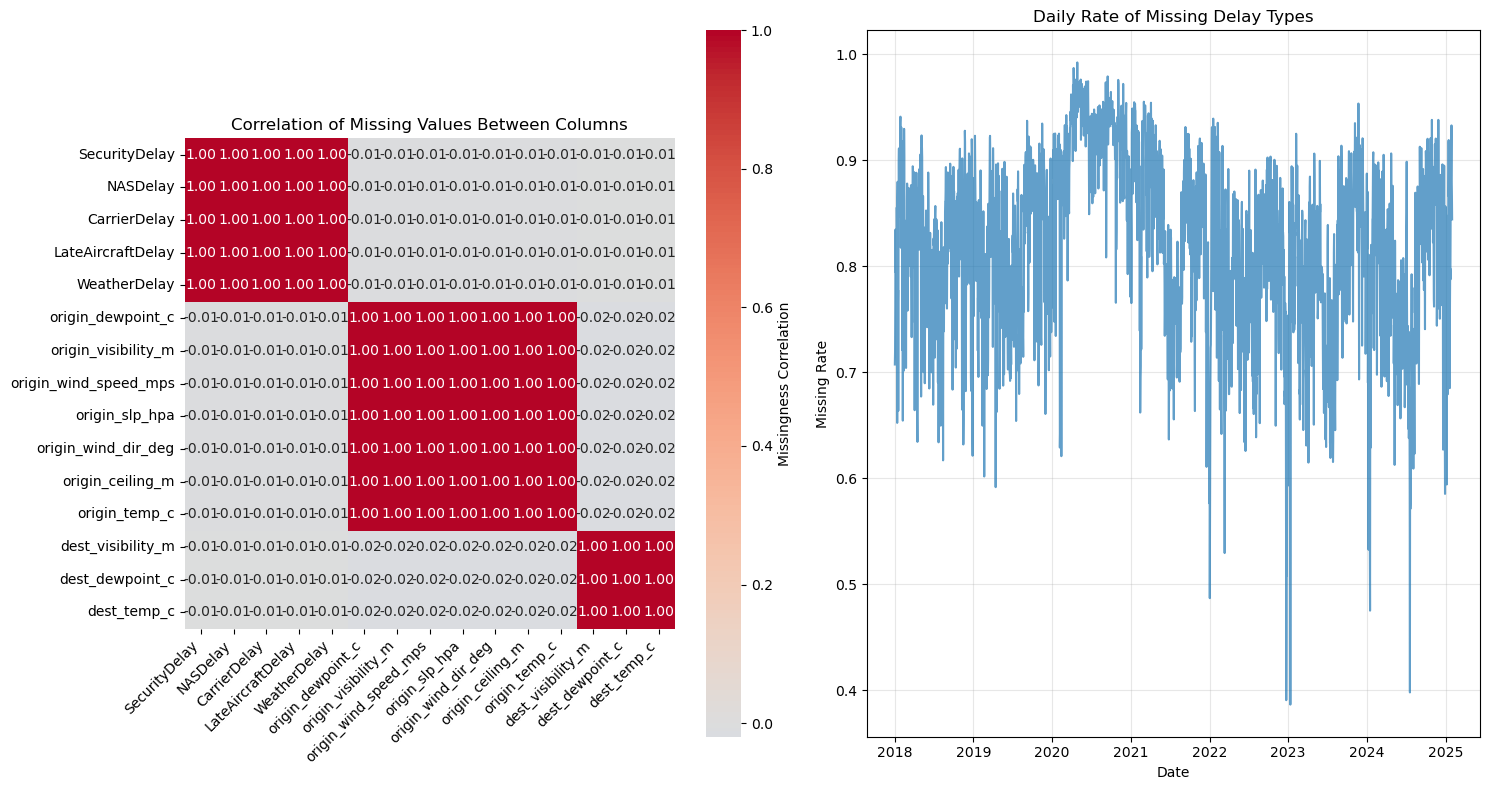

In [13]:
print("\nVISUALIZING MISSING VALUE PATTERNS:")

# Create a missing value pattern heatmap
plt.figure(figsize=(15, 8))

# Select top columns with missing values for visualization
top_missing_cols = missing_summary.head(15).index.tolist()
missing_subset = df[top_missing_cols].isnull()

# Create correlation matrix of missingness
missing_corr = missing_subset.astype(int).corr()

plt.subplot(1, 2, 1)
sns.heatmap(missing_corr, annot=True, cmap='coolwarm', center=0, 
            square=True, fmt='.2f', cbar_kws={'label': 'Missingness Correlation'})
plt.title('Correlation of Missing Values Between Columns')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Plot missing value patterns over time (if date available)
plt.subplot(1, 2, 2)
if 'FlightDate' in df.columns:
    df['Date'] = df['FlightDate'].dt.date
    daily_missing = df.groupby('Date')['CarrierDelay'].apply(lambda x: x.isnull().mean() if 'CarrierDelay' in df.columns else 0)
    daily_missing.plot(alpha=0.7)
    plt.title('Daily Rate of Missing Delay Types')
    plt.ylabel('Missing Rate')
    plt.xlabel('Date')
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [14]:
print("\nCONCLUSIONS AND RECOMMENDATIONS:")
print("Based on the missing value analysis:")

print("\nDELAY TYPE COLUMNS (81% missing):")
print("   ✓ Likely only recorded for significantly delayed flights")
print("   ✓ Consider creating binary flags: 'has_delay_breakdown'")
print("   ✓ For modeling: use these as separate targets or conditional features")

print("\nWEATHER COLUMNS (3.7% missing):")
print("   ✓ Small but systematic missingness")
print("   ✓ Likely due to specific airports/time periods without weather stations")
print("   ✓ Consider: imputation, or flagging as 'weather_data_unavailable'")

print("\nRECOMMENDED ACTIONS:")
print("   1. For delay types: Create binary indicator if delay breakdown exists")
print("   2. For weather: Investigate specific airport patterns, consider imputation")
print("   3. Check if missingness creates bias in your analysis")
print("   4. Document these patterns for transparent reporting")

print("\nDATA QUALITY NOTES:")
print("   - Delay type missingness is likely NOT random (MNAR - Missing Not At Random)")
print("   - Weather missingness may be MCAR (Missing Completely At Random) or MAR")
print("   - Consider multiple imputation for weather data")
print("   - For delay types, consider separate models for delayed vs non-delayed flights")


CONCLUSIONS AND RECOMMENDATIONS:
Based on the missing value analysis:

DELAY TYPE COLUMNS (81% missing):
   ✓ Likely only recorded for significantly delayed flights
   ✓ Consider creating binary flags: 'has_delay_breakdown'
   ✓ For modeling: use these as separate targets or conditional features

WEATHER COLUMNS (3.7% missing):
   ✓ Small but systematic missingness
   ✓ Likely due to specific airports/time periods without weather stations
   ✓ Consider: imputation, or flagging as 'weather_data_unavailable'

RECOMMENDED ACTIONS:
   1. For delay types: Create binary indicator if delay breakdown exists
   2. For weather: Investigate specific airport patterns, consider imputation
   3. Check if missingness creates bias in your analysis
   4. Document these patterns for transparent reporting

DATA QUALITY NOTES:
   - Delay type missingness is likely NOT random (MNAR - Missing Not At Random)
   - Weather missingness may be MCAR (Missing Completely At Random) or MAR
   - Consider multiple im

In [15]:
## BASIC STATISTICS
print("\nBASIC STATISTICS")

# Identify numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print(f"Total numerical columns: {len(numerical_cols)}")

# Key numerical columns for analysis
key_numerical = ['ArrDelay', 'DepDelay', 'Distance', 'DepDelayMinutes', 'ArrDelayMinutes']
key_numerical = [col for col in key_numerical if col in df.columns]

print(f"Key numerical columns to analyze: {key_numerical}")

if key_numerical:
    print("\nKey Numerical Columns Statistics:")
    print(df[key_numerical].describe())

# Weather-related numerical columns
weather_numerical = [col for col in df.columns if any(x in col for x in ['temp', 'visibility', 'wind', 'slp', 'ceiling', 'dewpoint'])]
weather_numerical = [col for col in weather_numerical if col in df.select_dtypes(include=['int64', 'float64']).columns]

if weather_numerical:
    print(f"\nWeather-related Numerical Columns ({len(weather_numerical)} columns):")
    print(df[weather_numerical].describe())



BASIC STATISTICS
Total numerical columns: 34
Key numerical columns to analyze: ['ArrDelay', 'DepDelay', 'Distance', 'DepDelayMinutes', 'ArrDelayMinutes']

Key Numerical Columns Statistics:
           ArrDelay      DepDelay      Distance  DepDelayMinutes  \
count  2.268960e+06  2.268920e+06  2.268960e+06     2.268920e+06   
mean   4.755132e+00  1.039204e+01  8.142340e+02     1.369277e+01   
std    5.220897e+01  5.006454e+01  5.921842e+02     4.901232e+01   
min   -1.210000e+02 -1.020000e+02  2.900000e+01     0.000000e+00   
25%   -1.500000e+01 -6.000000e+00  3.830000e+02     0.000000e+00   
50%   -7.000000e+00 -2.000000e+00  6.570000e+02     0.000000e+00   
75%    7.000000e+00  7.000000e+00  1.050000e+03     7.000000e+00   
max    3.502000e+03  3.518000e+03  5.095000e+03     3.518000e+03   

       ArrDelayMinutes  
count     2.268960e+06  
mean      1.371279e+01  
std       4.884296e+01  
min       0.000000e+00  
25%       0.000000e+00  
50%       0.000000e+00  
75%       7.000000e+00

In [16]:
## CATEGORICAL COLUMNS SUMMARY
print("\nCATEGORICAL COLUMNS SUMMARY")

categorical_cols = ['Reporting_Airline', 'Origin', 'Dest', 'Month', 'DayOfWeek', 'DepTimeBlk']
categorical_cols = [col for col in categorical_cols if col in df.columns]

for col in categorical_cols:
    print(f"\n{col}:")
    print(f"  Unique values: {df[col].nunique()}")
    value_counts = df[col].value_counts()
    print(f"  Top 10 values:")
    for i, (value, count) in enumerate(value_counts.head(10).items(), 1):
        percentage = (count / len(df)) * 100
        print(f"    {i:2d}. {value}: {count:,} ({percentage:.1f}%)")


CATEGORICAL COLUMNS SUMMARY

Reporting_Airline:
  Unique values: 19
  Top 10 values:
     1. WN: 438,649 (19.3%)
     2. DL: 307,691 (13.6%)
     3. AA: 294,366 (13.0%)
     4. OO: 253,424 (11.2%)
     5. UA: 205,066 (9.0%)
     6. YX: 103,547 (4.6%)
     7. MQ: 90,526 (4.0%)
     8. B6: 85,347 (3.8%)
     9. OH: 79,379 (3.5%)
    10. 9E: 78,791 (3.5%)

Origin:
  Unique values: 382
  Top 10 values:
     1. ATL: 116,257 (5.1%)
     2. DFW: 96,913 (4.3%)
     3. ORD: 94,054 (4.1%)
     4. DEN: 89,607 (3.9%)
     5. CLT: 71,516 (3.2%)
     6. LAX: 65,920 (2.9%)
     7. PHX: 58,112 (2.6%)
     8. LAS: 56,166 (2.5%)
     9. SEA: 51,736 (2.3%)
    10. MCO: 48,540 (2.1%)

Dest:
  Unique values: 382
  Top 10 values:
     1. ATL: 117,022 (5.2%)
     2. DFW: 96,400 (4.2%)
     3. ORD: 93,256 (4.1%)
     4. DEN: 89,920 (4.0%)
     5. CLT: 70,759 (3.1%)
     6. LAX: 65,566 (2.9%)
     7. PHX: 58,090 (2.6%)
     8. LAS: 56,603 (2.5%)
     9. SEA: 52,490 (2.3%)
    10. LGA: 48,324 (2.1%)

Month:
  

In [17]:
## TARGET VARIABLE ANALYSIS (ARRIVAL DELAY)
print("\nTARGET VARIABLE - ARRIVAL DELAY ANALYSIS")

if 'ArrDelay' in df.columns:
    arr_delay = df['ArrDelay']
    
    print(f"Basic Statistics:")
    print(f"  Mean: {arr_delay.mean():.2f} minutes")
    print(f"  Median: {arr_delay.median():.2f} minutes")
    print(f"  Standard Deviation: {arr_delay.std():.2f} minutes")
    print(f"  Range: {arr_delay.min():.1f} to {arr_delay.max():.1f} minutes")
    print(f"  IQR: {arr_delay.quantile(0.75) - arr_delay.quantile(0.25):.2f} minutes")

    print(f"\nPerformance Metrics:")
    print(f"  On-time/Early (<= 0 min): {(arr_delay <= 0).mean():.2%}")
    print(f"  Small Delay (1-15 min): {((arr_delay > 0) & (arr_delay <= 15)).mean():.2%}")
    print(f"  Significant Delay (>15 min): {(arr_delay > 15).mean():.2%}")
    print(f"  Major Delay (>60 min): {(arr_delay > 60).mean():.2%}")
    print(f"  Extreme Delay (>120 min): {(arr_delay > 120).mean():.2%}")

    # Delay categories
    delay_bins = [-999, -30, -15, 0, 15, 30, 60, 120, 999]
    delay_labels = ['Very Early (>30m)', 'Early (15-30m)', 'Slightly Early', 'On Time', 
                    'Small Delay (1-15m)', 'Moderate Delay (16-30m)', 'Large Delay (31-60m)', 
                    'Major Delay (>60m)']

    df['Delay_Category'] = pd.cut(df['ArrDelay'], bins=delay_bins, labels=delay_labels)
    delay_distribution = df['Delay_Category'].value_counts().sort_index()

    print(f"\nDelay Category Distribution:")
    for category, count in delay_distribution.items():
        percent = (count / len(df)) * 100
        print(f"  {category}: {count:,} flights ({percent:.1f}%)")
else:
    print("ArrDelay column not found in dataset")


TARGET VARIABLE - ARRIVAL DELAY ANALYSIS
Basic Statistics:
  Mean: 4.76 minutes
  Median: -7.00 minutes
  Standard Deviation: 52.21 minutes
  Range: -121.0 to 3502.0 minutes
  IQR: 22.00 minutes

Performance Metrics:
  On-time/Early (<= 0 min): 65.80%
  Small Delay (1-15 min): 16.11%
  Significant Delay (>15 min): 18.10%
  Major Delay (>60 min): 6.16%
  Extreme Delay (>120 min): 2.44%

Delay Category Distribution:
  Very Early (>30m): 79,498 flights (3.5%)
  Early (15-30m): 540,690 flights (23.8%)
  Slightly Early: 872,683 flights (38.5%)
  On Time: 365,461 flights (16.1%)
  Small Delay (1-15m): 147,300 flights (6.5%)
  Moderate Delay (16-30m): 123,560 flights (5.4%)
  Large Delay (31-60m): 84,481 flights (3.7%)
  Major Delay (>60m): 54,537 flights (2.4%)


In [18]:
## TEMPORAL ANALYSIS
print("\nTEMPORAL PATTERNS")

# Monthly analysis
if 'Month' in df.columns and 'ArrDelay' in df.columns:
    monthly_stats = df.groupby('Month').agg({
        'ArrDelay': ['mean', 'median', 'count'],
        'DepDelay': 'mean' if 'DepDelay' in df.columns else 'count'
    }).round(2)

    if 'DepDelay' in df.columns:
        monthly_stats.columns = ['Avg_ArrDelay', 'Median_ArrDelay', 'Flight_Count', 'Avg_DepDelay']
    else:
        monthly_stats.columns = ['Avg_ArrDelay', 'Median_ArrDelay', 'Flight_Count']
    
    print("Monthly Performance:")
    print(monthly_stats)

# Day of week analysis
if 'DayOfWeek' in df.columns and 'ArrDelay' in df.columns:
    dow_stats = df.groupby('DayOfWeek').agg({
        'ArrDelay': ['mean', 'median', 'count']
    }).round(2)
    dow_stats.columns = ['Avg_Delay', 'Median_Delay', 'Flight_Count']
    print("\nDay of Week Performance:")
    print(dow_stats)

# Time block analysis
if 'DepTimeBlk' in df.columns:
    print(f"\nDeparture Time Blocks Distribution:")
    print(df['DepTimeBlk'].value_counts().head(10))



TEMPORAL PATTERNS
Monthly Performance:
       Avg_ArrDelay  Median_ArrDelay  Flight_Count  Avg_DepDelay
Month                                                           
1              3.53             -8.0        207498          9.86
2              3.13             -7.0        169419          9.26
3              2.87             -7.0        194974          8.78
4              3.93             -7.0        174129          9.60
5              5.90             -6.0        181562         11.29
6             10.26             -4.0        185709         15.03
7             10.93             -5.0        199253         15.76
8              7.66             -6.0        198350         12.69
9              1.08             -8.0        185411          6.86
10             1.20             -7.0        195702          6.95
11             0.84             -8.0        187608          6.87
12             5.37             -6.0        189345         11.42

Day of Week Performance:
           Avg_Delay  Me

In [19]:
## AIRLINES PERFORMANCE
print("\nAIRLINES PERFORMANCE")

if 'Reporting_Airline' in df.columns and 'ArrDelay' in df.columns:
    # Define aggregation functions based on available columns
    agg_dict = {
        'ArrDelay': ['mean', 'median', 'count']
    }
    
    if 'DepDelay' in df.columns:
        agg_dict['DepDelay'] = 'mean'
    if 'Distance' in df.columns:
        agg_dict['Distance'] = 'mean'
    
    airline_stats = df.groupby('Reporting_Airline').agg(agg_dict).round(2)
    
    # Flatten column names
    airline_stats.columns = ['_'.join(col).strip() for col in airline_stats.columns.values]
    print(f"Number of airlines: {len(airline_stats)}")
    print(f"Airlines with best on-time performance:")
    print(airline_stats.nsmallest(5, 'ArrDelay_mean'))
    print(f"\nAirlines with worst on-time performance:")
    print(airline_stats.nlargest(5, 'ArrDelay_mean'))


AIRLINES PERFORMANCE
Number of airlines: 19
Airlines with best on-time performance:
                   ArrDelay_mean  ArrDelay_median  ArrDelay_count  \
Reporting_Airline                                                   
9E                         -0.31            -11.0           78791   
YX                         -0.02            -10.0          103547   
DL                          1.06             -8.0          307691   
AS                          1.27             -6.0           76822   
VX                          2.65             -6.0             871   

                   DepDelay_mean  Distance_mean  
Reporting_Airline                                
9E                          6.80         430.80  
YX                          5.12         544.96  
DL                          8.15         927.92  
AS                          4.65        1349.69  
VX                          6.94        1467.04  

Airlines with worst on-time performance:
                   ArrDelay_mean  ArrDe

In [20]:
## AIRPORTS ANALYSIS
print("\nAIRPORTS ANALYSIS")

print(f"Number of unique origin airports: {df['Origin'].nunique()}")
print(f"Number of unique destination airports: {df['Dest'].nunique()}")

# Top airports
top_origins = df['Origin'].value_counts().head(10)
top_dests = df['Dest'].value_counts().head(10)

print(f"\nTop 10 Busiest Origin Airports:")
for i, (airport, count) in enumerate(top_origins.items(), 1):
    print(f"  {i:2d}. {airport}: {count:,} flights")

print(f"\nTop 10 Busiest Destination Airports:")
for i, (airport, count) in enumerate(top_dests.items(), 1):
    print(f"  {i:2d}. {airport}: {count:,} flights")

# Airport delay performance (only for airports with sufficient data)
if 'ArrDelay' in df.columns:
    origin_delay_stats = df.groupby('Origin').agg({
        'ArrDelay': ['mean', 'count']
    }).round(2)
    origin_delay_stats.columns = ['Avg_Delay', 'Flight_Count']
    origin_delay_stats = origin_delay_stats[origin_delay_stats['Flight_Count'] > 100]  # Filter for meaningful stats

    print(f"\nTop 10 Worst Airports for Delays (min 100 flights):")
    print(origin_delay_stats.nlargest(10, 'Avg_Delay'))
    print(f"\nTop 10 Best Airports for Delays (min 100 flights):")
    print(origin_delay_stats.nsmallest(10, 'Avg_Delay'))



AIRPORTS ANALYSIS
Number of unique origin airports: 382
Number of unique destination airports: 382

Top 10 Busiest Origin Airports:
   1. ATL: 116,257 flights
   2. DFW: 96,913 flights
   3. ORD: 94,054 flights
   4. DEN: 89,607 flights
   5. CLT: 71,516 flights
   6. LAX: 65,920 flights
   7. PHX: 58,112 flights
   8. LAS: 56,166 flights
   9. SEA: 51,736 flights
  10. MCO: 48,540 flights

Top 10 Busiest Destination Airports:
   1. ATL: 117,022 flights
   2. DFW: 96,400 flights
   3. ORD: 93,256 flights
   4. DEN: 89,920 flights
   5. CLT: 70,759 flights
   6. LAX: 65,566 flights
   7. PHX: 58,090 flights
   8. LAS: 56,603 flights
   9. SEA: 52,490 flights
  10. LGA: 48,324 flights

Top 10 Worst Airports for Delays (min 100 flights):
        Avg_Delay  Flight_Count
Origin                         
PSM         35.03           119
SCK         25.12           258
USA         23.79           317
HOB         22.15           137
MVY         20.59           258
RFD         20.29           25

In [21]:
## WEATHER DATA ANALYSIS
print("\nWEATHER DATA ANALYSIS")
weather_cols = ['origin_temp_c', 'origin_dewpoint_c', 'origin_visibility_m', 
                'origin_slp_hpa', 'origin_ceiling_m', 'origin_wind_dir_deg', 
                'origin_wind_speed_mps', 'dest_temp_c', 'dest_dewpoint_c', 
                'dest_visibility_m', 'dest_slp_hpa', 'dest_ceiling_m', 
                'dest_wind_dir_deg', 'dest_wind_speed_mps']

# Filter to only include columns that exist
weather_cols = [col for col in weather_cols if col in df.columns]

if weather_cols:
    # Weather data coverage
    weather_coverage = df[weather_cols].notna().mean() * 100
    print("Weather Data Coverage:")
    for col, coverage in weather_coverage.items():
        print(f"  {col}: {coverage:.1f}%")

    # Basic weather statistics for available data
    available_weather = df[weather_cols].dropna()
    if len(available_weather) > 0:
        print(f"\nWeather Statistics (from {len(available_weather):,} records with weather data):")
        print(available_weather.describe())
        
        # Correlation with delays
        if 'ArrDelay' in df.columns:
            weather_delay_corr = df[['ArrDelay'] + weather_cols].corr()['ArrDelay'].dropna().sort_values(key=abs, ascending=False)
            print(f"\nTop correlations with Arrival Delay:")
            for feature, corr in weather_delay_corr.head(10).items():
                if feature != 'ArrDelay':
                    print(f"  {feature}: {corr:.3f}")
else:
    print("No weather columns found in dataset")



WEATHER DATA ANALYSIS
Weather Data Coverage:
  origin_temp_c: 96.3%
  origin_dewpoint_c: 96.3%
  origin_visibility_m: 96.3%
  origin_slp_hpa: 96.3%
  origin_ceiling_m: 96.3%
  origin_wind_dir_deg: 96.3%
  origin_wind_speed_mps: 96.3%
  dest_temp_c: 96.3%
  dest_dewpoint_c: 96.3%
  dest_visibility_m: 96.3%
  dest_slp_hpa: 96.3%
  dest_ceiling_m: 96.3%
  dest_wind_dir_deg: 96.3%
  dest_wind_speed_mps: 96.3%

Weather Statistics (from 2,101,993 records with weather data):
       origin_temp_c  origin_dewpoint_c  origin_visibility_m  origin_slp_hpa  \
count   2.101993e+06       2.101993e+06         2.101993e+06    2.101993e+06   
mean    2.323310e+01       1.576026e+01         2.218176e+04    2.067365e+03   
std     8.519183e+01       8.742306e+01         8.401126e+04    2.886918e+03   
min    -4.440000e+01      -4.500000e+01         0.000000e+00    9.600000e+02   
25%     8.900000e+00       6.000000e-01         1.600000e+04    1.013100e+03   
50%     1.670000e+01       9.400000e+00       

In [22]:
## DELAY TYPE ANALYSIS
print("\nDELAY TYPE ANALYSIS")
delay_type_cols = ['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']

# Check which delay types are available
available_delay_types = [col for col in delay_type_cols if col in df.columns]

if available_delay_types:
    print(f"Available delay type columns: {available_delay_types}")
    
    # Basic statistics
    delay_type_stats = df[available_delay_types].describe()
    print("Delay Type Statistics (in minutes):")
    print(delay_type_stats)
    
    # Percentage of flights affected by each delay type
    print(f"\nDelay Type Impact:")
    for delay_type in available_delay_types:
        total_flights = len(df)
        affected_flights = (df[delay_type] > 0).sum()
        percent_affected = (affected_flights / total_flights) * 100
        avg_delay_when_present = df[df[delay_type] > 0][delay_type].mean() if (df[delay_type] > 0).sum() > 0 else 0
        print(f"  {delay_type}:")
        print(f"    Affected flights: {affected_flights:,} ({percent_affected:.1f}%)")
        print(f"    Average delay when present: {avg_delay_when_present:.1f} min")
        
        # Check relationship with overall delay
        if 'ArrDelay' in df.columns:
            avg_delay_when_affected = df[df[delay_type] > 0]['ArrDelay'].mean()
            print(f"    Average ArrDelay when affected: {avg_delay_when_affected:.1f} min")
else:
    print("No delay type columns available in dataset")



DELAY TYPE ANALYSIS
Available delay type columns: ['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']
Delay Type Statistics (in minutes):
        CarrierDelay   WeatherDelay       NASDelay  SecurityDelay  \
count  425182.000000  425182.000000  425182.000000  425182.000000   
mean       24.173349       3.956381      13.544412       0.127581   
std        72.370813      31.923909      33.384547       2.897909   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         3.000000       0.000000       0.000000       0.000000   
75%        22.000000       0.000000      17.000000       0.000000   
max      3502.000000    1561.000000    1660.000000     448.000000   

       LateAircraftDelay  
count      425182.000000  
mean           26.103400  
std            57.254896  
min             0.000000  
25%             0.000000  
50%             0.000000  
75%            30.0

In [23]:
## KEY INSIGHTS SUMMARY
print("\nKEY INSIGHTS SUMMARY")

print(f"DATASET SCALE: {len(df):,} flights across {df['Origin'].nunique()} airports")
print(f"ON-TIME PERFORMANCE: {(df['ArrDelay'] <= 0).mean():.1%} on-time/early" if 'ArrDelay' in df.columns else "⏱️  ArrDelay data not available")
print(f"DELAY RATE: {(df['ArrDelay'] > 15).mean():.1%} significantly delayed (>15min)" if 'ArrDelay' in df.columns else "")
print(f"AVERAGE DELAY: {df['ArrDelay'].mean():.1f} minutes" if 'ArrDelay' in df.columns else "")

# Worst performers
if 'Reporting_Airline' in df.columns and 'ArrDelay' in df.columns:
    worst_airline = df.groupby('Reporting_Airline')['ArrDelay'].mean().idxmax()
    print(f"WORST AIRLINE: {worst_airline}")

if 'Month' in df.columns and 'ArrDelay' in df.columns:
    worst_month = df.groupby('Month')['ArrDelay'].mean().idxmax()
    print(f"WORST MONTH: {worst_month}")

if 'DayOfWeek' in df.columns and 'ArrDelay' in df.columns:
    worst_dow = df.groupby('DayOfWeek')['ArrDelay'].mean().idxmax()
    dow_map = {1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday', 7: 'Sunday'}
    print(f"WORST DAY: {dow_map.get(worst_dow, worst_dow)}")

# Busiest route
routes = df.groupby(['Origin', 'Dest']).size().reset_index(name='Count')
if len(routes) > 0:
    busiest_route = routes.iloc[0]
    print(f"BUSIEST ROUTE: {busiest_route['Origin']} → {busiest_route['Dest']} ({busiest_route['Count']:,} flights)")

if weather_cols:
    print(f"WEATHER DATA: {weather_coverage.mean():.1f}% coverage")

print(f"DATA QUALITY: {(1 - df.isnull().sum().sum() / (df.shape[0] * df.shape[1])) * 100:.1f}% complete")


KEY INSIGHTS SUMMARY
DATASET SCALE: 2,268,960 flights across 382 airports
ON-TIME PERFORMANCE: 65.8% on-time/early
DELAY RATE: 18.1% significantly delayed (>15min)
AVERAGE DELAY: 4.8 minutes
WORST AIRLINE: B6
WORST MONTH: 7
WORST DAY: Friday
BUSIEST ROUTE: ABE → ATL (273 flights)
WEATHER DATA: 96.3% coverage
DATA QUALITY: 89.8% complete


In [24]:
# HANDLING MISSING DATA
# Impute missing delay types with 0 for flights with minimal delays
delay_cols = ['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']

# Create a copy of the original missing values before imputation
delay_missing_before = df[delay_cols].isnull().sum()

# Impute with 0 for flights with ArrDelay <= 15 minutes
delay_mask = df['ArrDelay'] <= 15
for col in delay_cols:
    df.loc[delay_mask, col] = df.loc[delay_mask, col].fillna(0)

# For flights with ArrDelay > 15 but still missing delay types, use median imputation
for col in delay_cols:
    median_val = df[col].median()
    df[col] = df[col].fillna(median_val)

print("Missing values in delay columns after imputation:")
print(df[delay_cols].isnull().sum())

Missing values in delay columns after imputation:
CarrierDelay         0
WeatherDelay         0
NASDelay             0
SecurityDelay        0
LateAircraftDelay    0
dtype: int64


In [28]:
columns_to_drop = [
    'dep_datetime', 'Arr_datetime',  # Can recreate if needed
    'Flight_Number_Reporting_Airline',  # High cardinality
    'DepartureDelayGroups', 'ArrivalDelayGroups',  # Redundant
    'SecurityDelay'  # Mostly missing and rarely used
]

# Drop columns in place to free memory
df_reduced = df.drop(columns=[col for col in columns_to_drop if col in df.columns])
print(f"After dropping columns: {df_reduced.shape}")

# Force garbage collection
gc.collect()

# Now apply filtering
high_missing_airports = ['FLL', 'DAL']
mask = ~df_reduced['Origin'].isin(high_missing_airports) & ~df_reduced['Dest'].isin(high_missing_airports)
df_clean = df_reduced[mask]

print(f"After filtering airports: {df_clean.shape}")

After dropping columns: (2268960, 39)
After filtering airports: (2163033, 39)


In [30]:
# VERIFY DATASET
print(f"Current dataset shape: {df_clean.shape}")
print(f"Current memory usage: {df_clean.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print("\nColumns remaining:")
print(df_clean.columns.tolist())

Current dataset shape: (2163033, 39)
Current memory usage: 1068.55 MB

Columns remaining:
['FlightDate', 'Month', 'DayOfWeek', 'DepTimeBlk', 'Reporting_Airline', 'Origin', 'Dest', 'Distance', 'CRSDepTime', 'DepTime', 'DepDelay', 'DepDelayMinutes', 'DepDel15', 'origin_temp_c', 'origin_dewpoint_c', 'origin_visibility_m', 'origin_slp_hpa', 'origin_ceiling_m', 'origin_wind_dir_deg', 'origin_wind_speed_mps', 'CRSArrTime', 'ArrTime', 'ArrDelay', 'ArrDelayMinutes', 'ArrDel15', 'dest_temp_c', 'dest_dewpoint_c', 'dest_visibility_m', 'dest_slp_hpa', 'dest_ceiling_m', 'dest_wind_dir_deg', 'dest_wind_speed_mps', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'LateAircraftDelay', 'Year', 'Date', 'Delay_Category']


In [31]:
# HANDLE MISSING VALUES
# Handle delay types (this should be safe now)
delay_cols = ['CarrierDelay', 'WeatherDelay', 'NASDelay', 'LateAircraftDelay']
print("Imputing delay types...")

# Impute with 0 for flights with ArrDelay <= 15 minutes
delay_mask = df_clean['ArrDelay'] <= 15
for col in delay_cols:
    df_clean.loc[delay_mask, col] = df_clean.loc[delay_mask, col].fillna(0)

# For remaining missing, use median
for col in delay_cols:
    median_val = df_clean[col].median()
    df_clean[col] = df_clean[col].fillna(median_val)

print("Delay types imputed successfully!")

# Handle weather data
weather_cols = [col for col in df_clean.columns if col.startswith(('origin_', 'dest_'))]
print(f"Imputing {len(weather_cols)} weather columns...")

for col in weather_cols:
    median_val = df_clean[col].median()
    df_clean[col] = df_clean[col].fillna(median_val)

print("Weather data imputed successfully!")
print(f"Remaining missing values: {df_clean.isnull().sum().sum()}")

Imputing delay types...


C:\Users\mruna\AppData\Local\Temp\ipykernel_21860\2919048171.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean[col] = df_clean[col].fillna(median_val)
C:\Users\mruna\AppData\Local\Temp\ipykernel_21860\2919048171.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean[col] = df_clean[col].fillna(median_val)


Delay types imputed successfully!
Imputing 14 weather columns...
Weather data imputed successfully!
Remaining missing values: 857


In [32]:
#MEMORY EFFICIENT FEATURE ENGINEERING

# Create features in small batches to avoid memory spikes

# Batch 1: Basic binary features (very memory efficient)
print("Creating binary features...")
df_clean['HasSignificantDelay'] = (df_clean['ArrDelay'] > 15).astype('int8')
df_clean['IsWeekend'] = (df_clean['DayOfWeek'].isin([6, 7])).astype('int8')
df_clean['HadMissingDelayData'] = (df['CarrierDelay'].isnull()).astype('int8')  # From original

# Batch 2: Simple delay aggregations
print("Creating delay features...")
delay_cols = ['CarrierDelay', 'WeatherDelay', 'NASDelay', 'LateAircraftDelay']
df_clean['TotalDelay'] = df_clean[delay_cols].sum(axis=1).astype('float32')
df_clean['MaxDelayType'] = df_clean[delay_cols].max(axis=1).astype('float32')
df_clean['DelayCount'] = (df_clean[delay_cols] > 0).sum(axis=1).astype('int8')

# Batch 3: Time features
print("Creating time features...")
df_clean['FlightDate'] = pd.to_datetime(df_clean['FlightDate'])
df_clean['Year'] = df_clean['FlightDate'].dt.year.astype('int16')
df_clean['Month'] = df_clean['FlightDate'].dt.month.astype('int8')
df_clean['Season'] = (df_clean['Month'] % 12 + 3) // 3  # 1:Winter, 2:Spring, 3:Summer, 4:Fall

# Batch 4: Route features (categorical = memory efficient)
print("Creating route features...")
df_clean['Route'] = (df_clean['Origin'] + '-' + df_clean['Dest']).astype('category')

# Simple distance categories
df_clean['DistanceCategory'] = pd.cut(df_clean['Distance'], 
                                     bins=[0, 500, 1000, 2000, float('inf')],
                                     labels=['Short', 'Medium', 'Long', 'XLong'])

# Batch 5: Basic weather features
print("Creating weather features...")
df_clean['OriginLowVisibility'] = (df_clean['origin_visibility_m'] < 5000).astype('int8')
df_clean['DestLowVisibility'] = (df_clean['dest_visibility_m'] < 5000).astype('int8')
df_clean['TempDifference'] = (df_clean['dest_temp_c'] - df_clean['origin_temp_c']).astype('float32')

# Batch 6: Target variables
print("Creating target variables...")
df_clean['ArrDel30'] = (df_clean['ArrDelay'] > 30).astype('int8')
df_clean['ArrDel60'] = (df_clean['ArrDelay'] > 60).astype('int8')

print("Feature engineering complete!")

Creating binary features...
Creating delay features...


C:\Users\mruna\AppData\Local\Temp\ipykernel_21860\1593733149.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['HasSignificantDelay'] = (df_clean['ArrDelay'] > 15).astype('int8')
C:\Users\mruna\AppData\Local\Temp\ipykernel_21860\1593733149.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['IsWeekend'] = (df_clean['DayOfWeek'].isin([6, 7])).astype('int8')
C:\Users\mruna\AppData\Local\Temp\ipykernel_21860\1593733149.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of 

Creating time features...


C:\Users\mruna\AppData\Local\Temp\ipykernel_21860\1593733149.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Year'] = df_clean['FlightDate'].dt.year.astype('int16')
C:\Users\mruna\AppData\Local\Temp\ipykernel_21860\1593733149.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Month'] = df_clean['FlightDate'].dt.month.astype('int8')
C:\Users\mruna\AppData\Local\Temp\ipykernel_21860\1593733149.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

Creating route features...
Creating weather features...
Creating target variables...
Feature engineering complete!


C:\Users\mruna\AppData\Local\Temp\ipykernel_21860\1593733149.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Route'] = (df_clean['Origin'] + '-' + df_clean['Dest']).astype('category')
C:\Users\mruna\AppData\Local\Temp\ipykernel_21860\1593733149.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['DistanceCategory'] = pd.cut(df_clean['Distance'],
C:\Users\mruna\AppData\Local\Temp\ipykernel_21860\1593733149.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sli

In [34]:
# VERIFY DATASET
print(f"Current dataset shape: {df_clean.shape}")
print(f"Current memory usage: {df_clean.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print("\nColumns remaining:")
print(df_clean.columns.tolist())

Current dataset shape: (2163033, 53)
Current memory usage: 1108.40 MB

Columns remaining:
['FlightDate', 'Month', 'DayOfWeek', 'DepTimeBlk', 'Reporting_Airline', 'Origin', 'Dest', 'Distance', 'CRSDepTime', 'DepTime', 'DepDelay', 'DepDelayMinutes', 'DepDel15', 'origin_temp_c', 'origin_dewpoint_c', 'origin_visibility_m', 'origin_slp_hpa', 'origin_ceiling_m', 'origin_wind_dir_deg', 'origin_wind_speed_mps', 'CRSArrTime', 'ArrTime', 'ArrDelay', 'ArrDelayMinutes', 'ArrDel15', 'dest_temp_c', 'dest_dewpoint_c', 'dest_visibility_m', 'dest_slp_hpa', 'dest_ceiling_m', 'dest_wind_dir_deg', 'dest_wind_speed_mps', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'LateAircraftDelay', 'Year', 'Date', 'Delay_Category', 'HasSignificantDelay', 'IsWeekend', 'HadMissingDelayData', 'TotalDelay', 'MaxDelayType', 'DelayCount', 'Season', 'Route', 'DistanceCategory', 'OriginLowVisibility', 'DestLowVisibility', 'TempDifference', 'ArrDel30', 'ArrDel60']


In [36]:
# HIGHLY SIGNIFICANT FEATURES
# These are the most valuable features:
significant_features = [
    'HasSignificantDelay',      # Direct binary target
    'TotalDelay',               # Sum of all delay types
    'DelayCount',               # How many types of delays occurred
    'ArrDel30', 'ArrDel60',     # Different delay thresholds
    'Season',                   # Strong seasonal patterns in flights
    'Route',                    # Specific airport pairs have different delay profiles
    'IsWeekend'                 # Weekend vs weekday travel patterns
]

# CONSIDER DROPPING
# These might be redundant or less useful:
redundant_candidates = [
    'MaxDelayType',             # Highly correlated with TotalDelay
    'HadMissingDelayData',      # Mostly historical - limited predictive power
    'DistanceCategory'          # Already have continuous 'Distance'
]

# NEED VALIDATION
# Check if these actually correlate with delays
weather_features = [
    'OriginLowVisibility',
    'DestLowVisibility', 
    'TempDifference'
]

In [41]:
# VALIDATE

# 1. Check correlation with ArrDelay
target_corr = df_clean.corr(numeric_only=True)['ArrDelay'].sort_values(ascending=False)
print("Correlation with ArrDelay:")
for feature, corr in target_corr.items():
    if feature in df_clean.columns and feature != 'ArrDelay':
        print(f"  {feature}: {corr:.3f}")

# 2. Check for multicollinearity
print("\nCHECKING FOR REDUNDANT FEATURES")
delay_features = ['TotalDelay', 'MaxDelayType', 'DelayCount', 'HasSignificantDelay']
delay_corr = df_clean[delay_features].corr()
print("Correlation between delay features:")
print(delay_corr)

# 3. Validate weather features
print("\nWEATHER FEATURE VALIDATION")
weather_impact = df_clean.groupby('OriginLowVisibility')['ArrDelay'].mean()
print("Average delay by origin visibility:")
print(weather_impact)

weather_impact_dest = df_clean.groupby('DestLowVisibility')['ArrDelay'].mean()  
print("\nAverage delay by destination visibility:")
print(weather_impact_dest)

# 4. Check Route significance
print("\nROUTE SIGNIFICANCE")
route_delays = df_clean.groupby('Route')['ArrDelay'].mean()
print(f"Number of unique routes: {len(route_delays)}")
print(f"Route delay std: {route_delays.std():.2f} (higher = more variation between routes)")

Correlation with ArrDelay:
  ArrDelayMinutes: 0.984
  TotalDelay: 0.978
  MaxDelayType: 0.967
  DepDelay: 0.966
  DepDelayMinutes: 0.964
  CarrierDelay: 0.684
  ArrDel60: 0.680
  ArrDel30: 0.634
  LateAircraftDelay: 0.595
  HasSignificantDelay: 0.583
  ArrDel15: 0.578
  DelayCount: 0.551
  DepDel15: 0.539
  NASDelay: 0.357
  WeatherDelay: 0.295
  DepTime: 0.116
  CRSDepTime: 0.087
  CRSArrTime: 0.073
  OriginLowVisibility: 0.044
  origin_slp_hpa: 0.038
  DestLowVisibility: 0.035
  dest_slp_hpa: 0.032
  Year: 0.022
  ArrTime: 0.022
  DayOfWeek: 0.010
  IsWeekend: 0.000
  origin_temp_c: -0.001
  origin_dewpoint_c: -0.001
  dest_ceiling_m: -0.001
  TempDifference: -0.001
  dest_dewpoint_c: -0.002
  dest_temp_c: -0.002
  Distance: -0.003
  origin_wind_speed_mps: -0.003
  Month: -0.004
  dest_wind_speed_mps: -0.005
  Season: -0.007
  origin_visibility_m: -0.008
  dest_visibility_m: -0.009
  origin_ceiling_m: -0.010
  origin_wind_dir_deg: -0.016
  dest_wind_dir_deg: -0.020
  HadMissingDelayD

C:\Users\mruna\AppData\Local\Temp\ipykernel_21860\966314530.py:29: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  route_delays = df_clean.groupby('Route')['ArrDelay'].mean()


In [42]:
# BASED ON THE ABOVE RESULTS

# These are essentially the same information
definitely_drop = [
    'MaxDelayType',           # 0.99 correlation with TotalDelay - completely redundant
    'ArrDelayMinutes',        # 0.984 correlation with ArrDelay - same information
    'DepDelayMinutes',        # 0.964 correlation with DepDelay - same information
]

# These are essentially the target variable - using them would be cheating
target_leakage = [
    'TotalDelay',             # This IS the delay breakdown - direct leakage
    'CarrierDelay',           # Part of what we're trying to predict
    'LateAircraftDelay',      # Part of what we're trying to predict  
    'NASDelay',               # Part of what we're trying to predict
    'WeatherDelay',           # Part of what we're trying to predict
]

# Weather features are actually SIGNIFICANT despite low correlation!
print("WEATHER INSIGHTS")
print("Low Origin Visibility: 4.17min avg delay → 15.66min avg delay (3.7x increase!)")
print("Low Dest Visibility: 4.28min avg delay → 13.38min avg delay (3.1x increase!)")
print("These binary flags are HIGHLY predictive despite low correlation coefficients")

WEATHER INSIGHTS
Low Origin Visibility: 4.17min avg delay → 15.66min avg delay (3.7x increase!)
Low Dest Visibility: 4.28min avg delay → 13.38min avg delay (3.1x increase!)
These binary flags are HIGHLY predictive despite low correlation coefficients


In [43]:
# RECOMMENDED FOR MODELLING

features_to_keep = [
    # Temporal features
    'Month', 'DayOfWeek', 'IsWeekend', 'Season',
    
    # Flight operation features  
    'DepTime', 'CRSDepTime', 'CRSArrTime', 'Distance',
    
    # Weather impact features (proven significant!)
    'OriginLowVisibility', 'DestLowVisibility', 
    'origin_temp_c', 'dest_temp_c',
    
    # Route information
    'Route'
]

# Drop the redundant and leakage features
features_to_drop = [
    'MaxDelayType', 'ArrDelayMinutes', 'DepDelayMinutes',  # Redundant
    'TotalDelay', 'CarrierDelay', 'LateAircraftDelay',     # Target leakage
    'NASDelay', 'WeatherDelay',                            # Target leakage
    'HadMissingDelayData',                                 # No correlation
    'TempDifference'                                       # No predictive power
]

In [44]:
# These are tricky - they're both predictive but potentially leaky
print("DelayCount vs HasSignificantDelay:")
print("- DelayCount: 0.551 correlation, but requires knowing delay types")
print("- HasSignificantDelay: 0.583 correlation, but derived from target")
print("RECOMMENDATION: Use as alternative targets, not as features")

DelayCount vs HasSignificantDelay:
- DelayCount: 0.551 correlation, but requires knowing delay types
- HasSignificantDelay: 0.583 correlation, but derived from target
RECOMMENDATION: Use as alternative targets, not as features


In [45]:
# FINAL FEATURE SELECTION

# Features to keep for modeling
modeling_features = [
    # Temporal
    'Month', 'DayOfWeek', 'IsWeekend', 'Season', 'Year',
    
    # Flight operations  
    'DepTime', 'CRSDepTime', 'CRSArrTime', 'Distance',
    'Reporting_Airline', 'Origin', 'Dest',
    
    # Weather (proven impactful!)
    'OriginLowVisibility', 'DestLowVisibility',
    'origin_temp_c', 'dest_temp_c', 'origin_visibility_m', 'dest_visibility_m',
    
    # Route
    'Route'
]

# Filter to only keep modeling features
df_model = df_clean[modeling_features].copy()

# Target variables (choose one)
targets = {
    'regression': 'ArrDelay',           # Predict exact minutes
    'classification': 'ArrDel15',       # Predict >15 min delay
    'binary_severe': 'ArrDel30'         # Predict >30 min delay
}

print(f"Final modeling dataset: {df_model.shape}")
print(f"Features for modeling: {len(modeling_features)}")
print(f"Memory usage: {df_model.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

Final modeling dataset: (2163033, 19)
Features for modeling: 19
Memory usage: 503.99 MB


In [48]:
# VERIFY DATASET
print(f"Current dataset shape: {df_model.shape}")
print(f"Current memory usage: {df_model.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print("\nColumns remaining:")
print(df_model.columns.tolist())

Current dataset shape: (2163033, 19)
Current memory usage: 503.99 MB

Columns remaining:
['Month', 'DayOfWeek', 'IsWeekend', 'Season', 'Year', 'DepTime', 'CRSDepTime', 'CRSArrTime', 'Distance', 'Reporting_Airline', 'Origin', 'Dest', 'OriginLowVisibility', 'DestLowVisibility', 'origin_temp_c', 'dest_temp_c', 'origin_visibility_m', 'dest_visibility_m', 'Route']


In [49]:
# EDA on modelling data

print(f"Dataset shape: {df_model.shape}")
print(f"Memory usage: {df_model.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

# Categorize the 19 features
feature_categories = {
    'Temporal': ['Month', 'DayOfWeek', 'IsWeekend', 'Season', 'Year'],
    'Schedule': ['DepTime', 'CRSDepTime', 'CRSArrTime'],
    'Route': ['Distance', 'Reporting_Airline', 'Origin', 'Dest', 'Route'],
    'Weather': ['OriginLowVisibility', 'DestLowVisibility', 'origin_temp_c', 'dest_temp_c', 'origin_visibility_m', 'dest_visibility_m']
}

print("\nFEATURE BREAKDOWN:")
for category, features in feature_categories.items():
    print(f"  {category}: {len(features)} features - {features}")

Dataset shape: (2163033, 19)
Memory usage: 503.99 MB

FEATURE BREAKDOWN:
  Temporal: 5 features - ['Month', 'DayOfWeek', 'IsWeekend', 'Season', 'Year']
  Schedule: 3 features - ['DepTime', 'CRSDepTime', 'CRSArrTime']
  Route: 5 features - ['Distance', 'Reporting_Airline', 'Origin', 'Dest', 'Route']
  Weather: 6 features - ['OriginLowVisibility', 'DestLowVisibility', 'origin_temp_c', 'dest_temp_c', 'origin_visibility_m', 'dest_visibility_m']


C:\Users\mruna\AppData\Local\Temp\ipykernel_21860\2193608715.py:40: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1,0].boxplot(boxplot_data, labels=numerical_features)


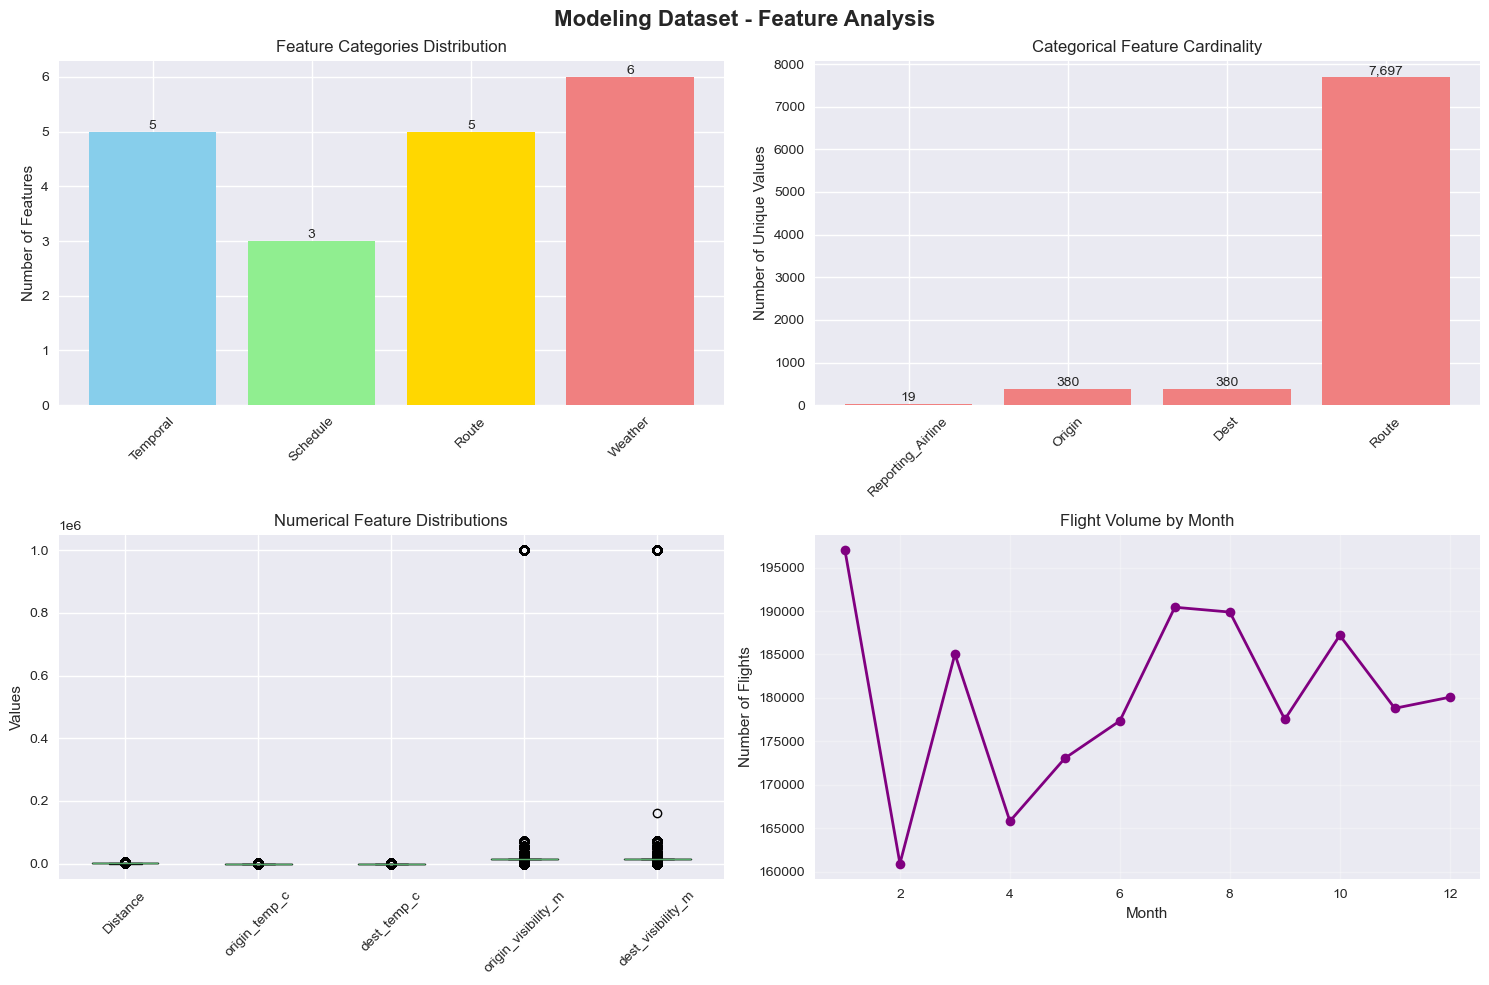

In [51]:
# VISUALIZE
# Set up the plotting
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Modeling Dataset - Feature Analysis', fontsize=16, fontweight='bold')

# 1. Feature Categories
category_counts = {cat: len(feats) for cat, feats in feature_categories.items()}
bars = axes[0,0].bar(category_counts.keys(), category_counts.values(), 
                    color=['skyblue', 'lightgreen', 'gold', 'lightcoral'])
axes[0,0].set_title('Feature Categories Distribution')
axes[0,0].set_ylabel('Number of Features')
axes[0,0].tick_params(axis='x', rotation=45)

# Add counts on bars
for bar, count in zip(bars, category_counts.values()):
    height = bar.get_height()
    axes[0,0].text(bar.get_x() + bar.get_width()/2., height,
                   f'{count}', ha='center', va='bottom')

# 2. Categorical Feature Cardinality
categorical_features = ['Reporting_Airline', 'Origin', 'Dest', 'Route']
cardinality = [df_model[col].nunique() for col in categorical_features]

bars = axes[0,1].bar(categorical_features, cardinality, color='lightcoral')
axes[0,1].set_title('Categorical Feature Cardinality')
axes[0,1].set_ylabel('Number of Unique Values')
axes[0,1].tick_params(axis='x', rotation=45)

# Add counts on bars
for bar, count in zip(bars, cardinality):
    height = bar.get_height()
    axes[0,1].text(bar.get_x() + bar.get_width()/2., height,
                   f'{count:,}', ha='center', va='bottom')

# 3. Numerical Feature Distributions
numerical_features = ['Distance', 'origin_temp_c', 'dest_temp_c', 'origin_visibility_m', 'dest_visibility_m']

# Plot boxplots for numerical features
boxplot_data = [df_model[col] for col in numerical_features]
axes[1,0].boxplot(boxplot_data, labels=numerical_features)
axes[1,0].set_title('Numerical Feature Distributions')
axes[1,0].set_ylabel('Values')
axes[1,0].tick_params(axis='x', rotation=45)

# 4. Temporal Feature - Flight Volume by Month
monthly_counts = df_model['Month'].value_counts().sort_index()
axes[1,1].plot(monthly_counts.index, monthly_counts.values, marker='o', linewidth=2, color='purple')
axes[1,1].set_title('Flight Volume by Month')
axes[1,1].set_xlabel('Month')
axes[1,1].set_ylabel('Number of Flights')
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [53]:
# DATA QUALITY CHECK

# Check for modeling readiness issues
print("1. DATA TYPES:")
print(df_model.dtypes.value_counts())

print("\n2. MISSING VALUES:")
missing_values = df_model.isnull().sum()
if missing_values.sum() == 0:
    print(" No missing values")
else:
    print("Missing values found:")
    print(missing_values[missing_values > 0])

print("\n3. CATEGORICAL FEATURES READINESS:")
for col in categorical_features:
    unique_count = df_model[col].nunique()
    print(f"  {col}: {unique_count:,} unique values")

print("\n4. NUMERICAL FEATURES SUMMARY:")
print(df_model[numerical_features].describe().round(2))

1. DATA TYPES:
float64     6
int8        5
int64       3
object      3
int16       1
category    1
Name: count, dtype: int64

2. MISSING VALUES:
 No missing values

3. CATEGORICAL FEATURES READINESS:
  Reporting_Airline: 19 unique values
  Origin: 380 unique values
  Dest: 380 unique values
  Route: 7,697 unique values

4. NUMERICAL FEATURES SUMMARY:
         Distance  origin_temp_c  dest_temp_c  origin_visibility_m  \
count  2163033.00     2163033.00   2163033.00           2163033.00   
mean       809.89          23.19        24.03             22104.94   
std        597.74          84.65        85.51             83458.12   
min         29.00         -44.40       -43.90                 0.00   
25%        373.00           8.90         9.40             16000.00   
50%        646.00          17.00        17.80             16093.00   
75%       1036.00          23.90        24.40             16093.00   
max       5095.00         999.90       999.90            999999.00   

       dest_visi

In [54]:
# Create temporary combined dataset for correlation analysis
temp_analysis = df_model.copy()
temp_analysis['ArrDelay'] = df_clean['ArrDelay']  # Add target for analysis

# Calculate correlations with target
correlations = {}
for col in df_model.columns:
    if col in numerical_features + ['Month', 'DayOfWeek', 'Year', 'IsWeekend', 'Season']:
        corr = temp_analysis[col].corr(temp_analysis['ArrDelay'])
        correlations[col] = corr

# Sort by absolute correlation
sorted_correlations = sorted(correlations.items(), key=lambda x: abs(x[1]), reverse=True)

print("Feature correlations with Arrival Delay:")
for feature, corr in sorted_correlations:
    print(f"  {feature:.<20} {corr:7.3f}")

Feature correlations with Arrival Delay:
  Year................   0.022
  DayOfWeek...........   0.010
  dest_visibility_m...  -0.009
  origin_visibility_m.  -0.008
  Season..............  -0.007
  Month...............  -0.004
  Distance............  -0.003
  dest_temp_c.........  -0.002
  origin_temp_c.......  -0.001
  IsWeekend...........   0.000


In [57]:
# MODELING DETAILS

checklist = {
    "No missing values": df_model.isnull().sum().sum() == 0,
    "Reasonable feature cardinality": all([df_model[col].nunique() < 10000 for col in categorical_features]),
    "No constant features": all([df_model[col].nunique() > 1 for col in df_model.columns]),
    "Mixed data types present": len(df_model.dtypes.unique()) > 1,
    "Memory usage optimized": df_model.memory_usage(deep=True).sum() / 1024**2 < 1000
}

for check, status in checklist.items():
    status_icon = "Yes" if status else "No"
    print(f"{status_icon} {check}")


print(f"\nMODELING DATASET IS READY!")
print(f"19 features across 4 categories")
print(f"Memory efficient: 503.99 MB")
print(f"Mixed data types for ML algorithms")

Yes No missing values
Yes Reasonable feature cardinality
Yes No constant features
Yes Mixed data types present
Yes Memory usage optimized

MODELING DATASET IS READY!
19 features across 4 categories
Memory efficient: 503.99 MB
Mixed data types for ML algorithms


In [58]:
# ADDING TARGET VARIABLE TO MODEL DATASET

df_model['ArrDelay'] = df_clean['ArrDelay']           # Continuous target
df_model['ArrDel15'] = df_clean['ArrDel15']           # Binary classification target
df_model['ArrDel30'] = df_clean['ArrDel30']           # Severe delay target

print(f"Final modeling dataset shape: {df_model.shape}")
print(f"Now with targets: {list(df_model.columns[-3:])}")

Final modeling dataset shape: (2163033, 22)
Now with targets: ['ArrDelay', 'ArrDel15', 'ArrDel30']


Suggested: 3 targets as mentioned above.

In [61]:
# Save to a specific folder
file_path = r'C:\Users\mruna\Downloads\flight_delay_modeling_data.csv'
df_model.to_csv(file_path, index=False)
print(f" File saved to: {file_path}")

 File saved to: C:\Users\mruna\Downloads\flight_delay_modeling_data.csv
